In [1]:
%matplotlib qt5

import ipympl as ipympl
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from IPython.display import display

matplotlib.get_backend()


ImportError: Failed to import any qt binding

## Lectura y estandarización de datos

Mean:
[ 4.16333634e-17 -3.96508223e-17 -7.93016446e-17 -5.49560397e-15
 -3.17206578e-17 -1.98254112e-17 -3.09276414e-16]
Standard deviation:
[1. 1. 1. 1. 1. 1. 1.]


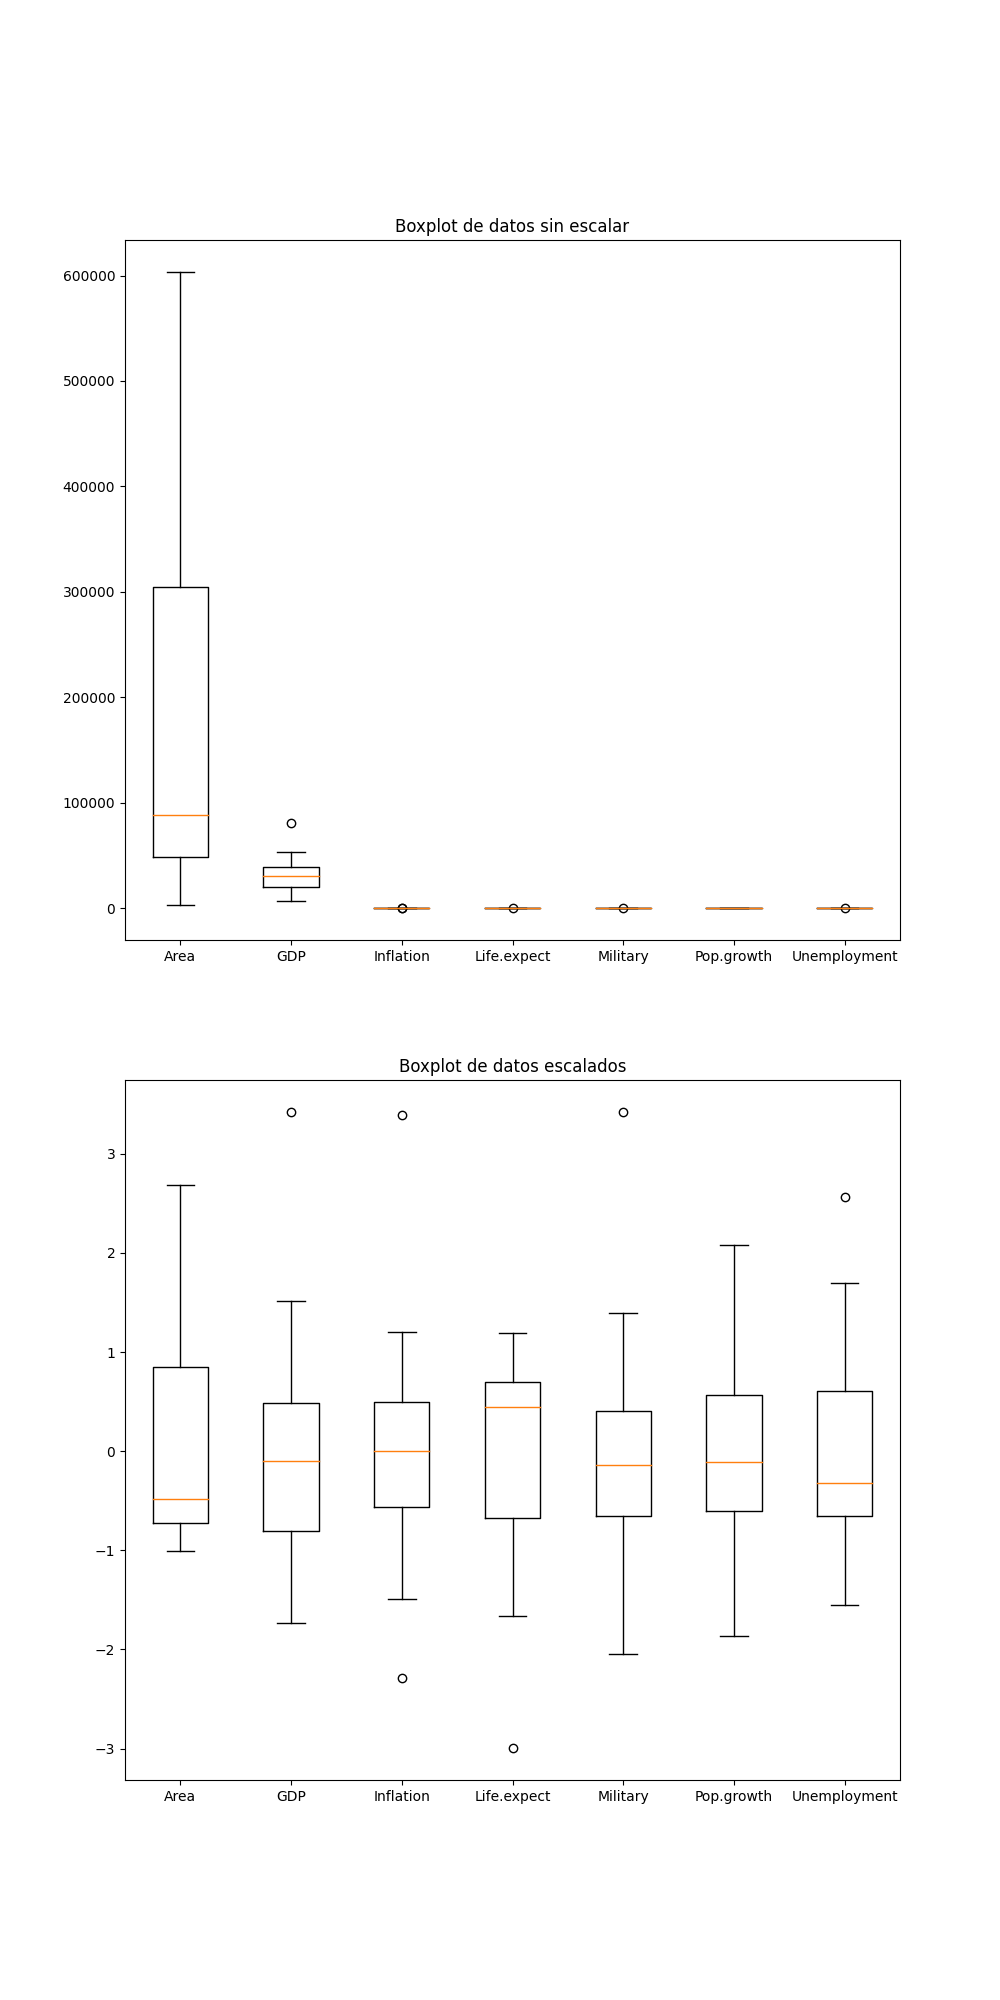

In [ ]:
data = pd.read_csv('./dataset/europe.csv', header=0)

data_no_countries = data.drop(['Country'], axis=1)
# Plot de data sin escalar
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))
axes[0].boxplot(data_no_countries)
axes[0].set_xticks([1, 2, 3, 4, 5, 6, 7], data_no_countries.columns)
axes[0].set_title('Boxplot de datos sin escalar')


scaler = StandardScaler().fit(data_no_countries)
scaled_data = scaler.transform(data_no_countries)
# Plot de data escalado
axes[1].boxplot(pd.DataFrame(scaled_data))
axes[1].set_xticks([1, 2, 3, 4, 5, 6, 7], data_no_countries.columns)
axes[1].set_title('Boxplot de datos escalados')

print("Mean:")
print(scaled_data.mean(axis=0))

print("Standard deviation:")
print(scaled_data.std(axis=0))
plt.show()

## PCA

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
First component,0.124874,-0.500506,0.406518,-0.482873,0.188112,-0.475704,0.271656


,Variance ratio,Cumulative variance
λ1,0.461024,0.461024
λ2,0.169589,0.630613
λ3,0.151884,0.782497
λ4,0.110051,0.892548
λ5,0.065407,0.957955
λ6,0.024096,0.982051
λ7,0.017949,1.000000


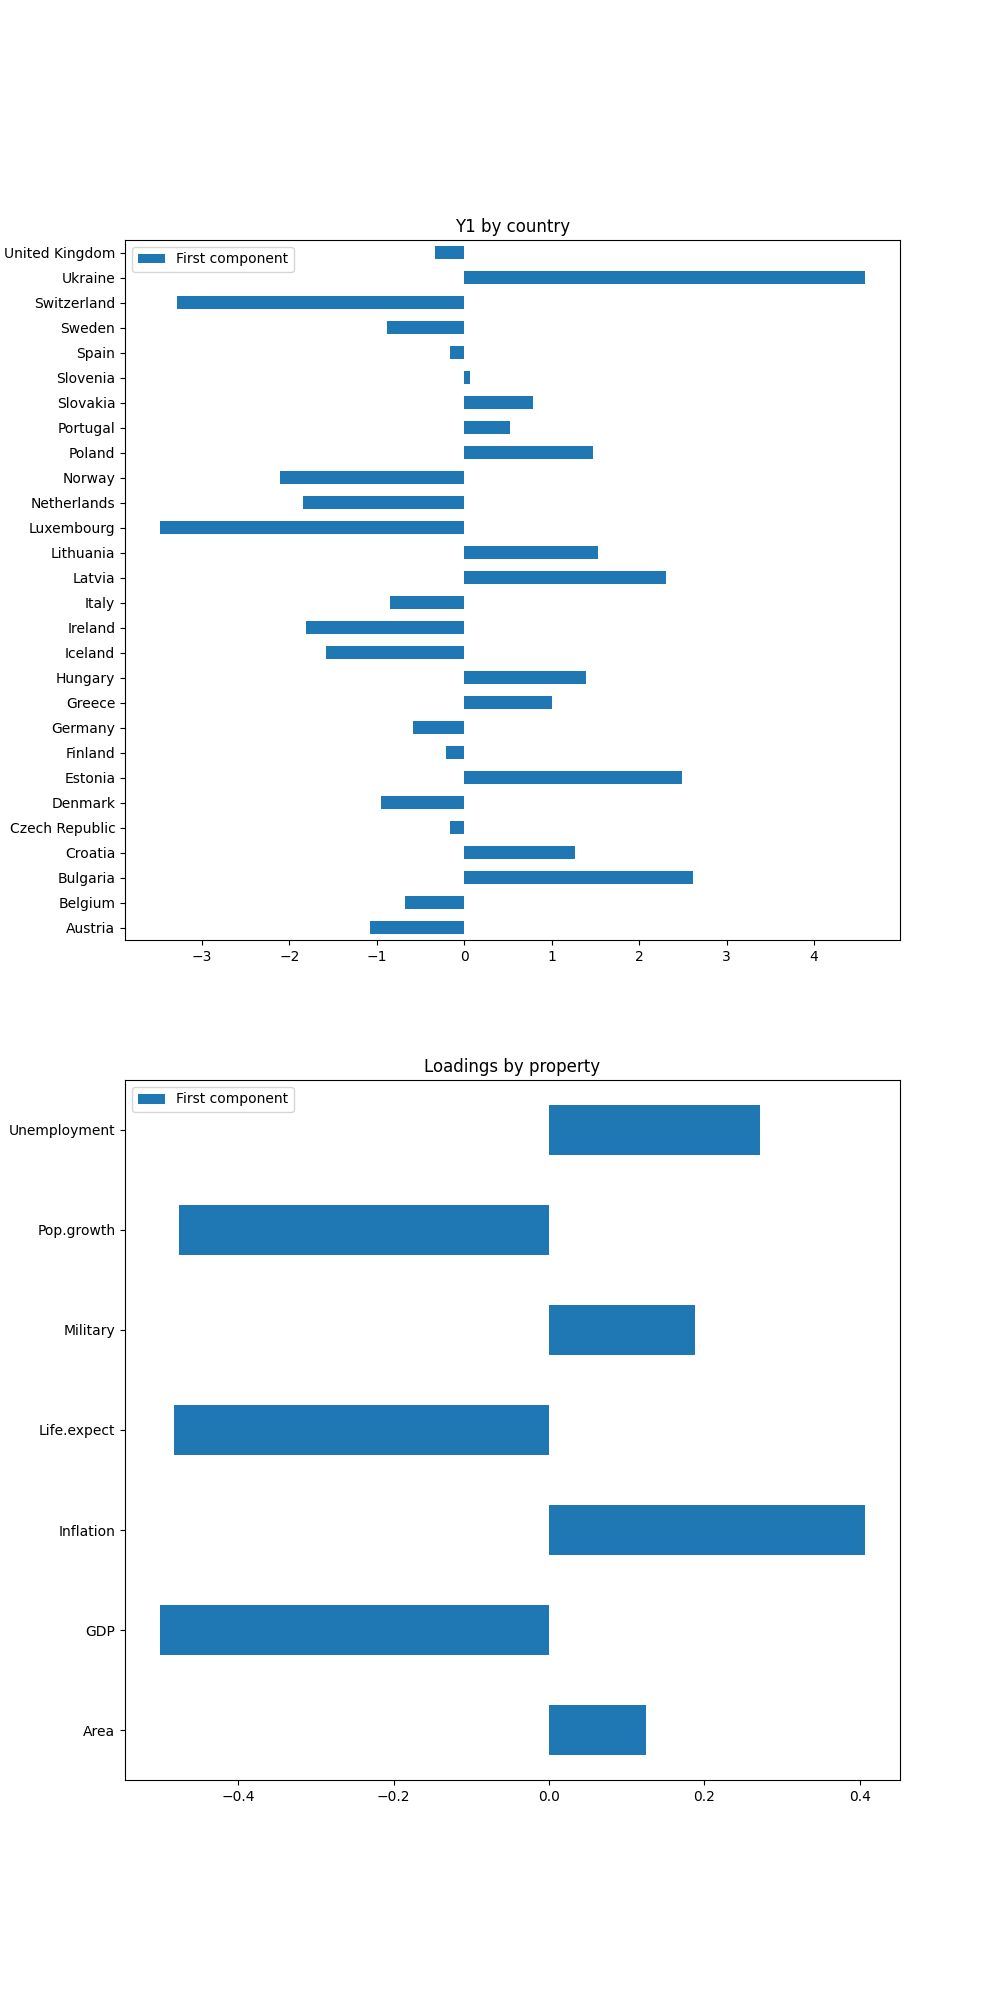

In [ ]:
pca = PCA()

pca.fit(scaled_data)

components = pca.components_

first_component = pd.DataFrame(components[0]).T
first_component.columns = data_no_countries.columns
first_component.index = ['First component']
first_component

display(first_component)

variance_ratio = pd.DataFrame(pca.explained_variance_ratio_)
variance_ratio.index = ['λ1', 'λ2', 'λ3', 'λ4', 'λ5', 'λ6', 'λ7']
variance_ratio.columns = ['Variance ratio']
variance_ratio.insert(
    value=pca.explained_variance_ratio_.cumsum(), column='Cumulative variance', loc=1)

display(variance_ratio)

scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.columns = data_no_countries.columns
scaled_data_df.index = data_no_countries.index


pc1_alignment = scaled_data_df.dot(first_component.T)

pc1_alignment.index = data['Country'].to_numpy()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))
pc1_alignment.plot.barh( y='First component', ax=axes[0])
axes[0].set_title('Y1 by country')
first_component.T.plot.barh( y='First component', ax=axes[1])
axes[1].set_title('Loadings by property')

plt.show()



## Biplot

0.12487390183337622 -0.1728722015740554
-0.5005058583604992 -0.13013955326325893
0.4065181548118897 -0.3696572425017243
-0.4828733253002009 0.2652477970155552
0.18811161613179747 0.658266888341771
-0.475703553912758 0.08262198310903919
0.27165582007504635 0.5532037052151455


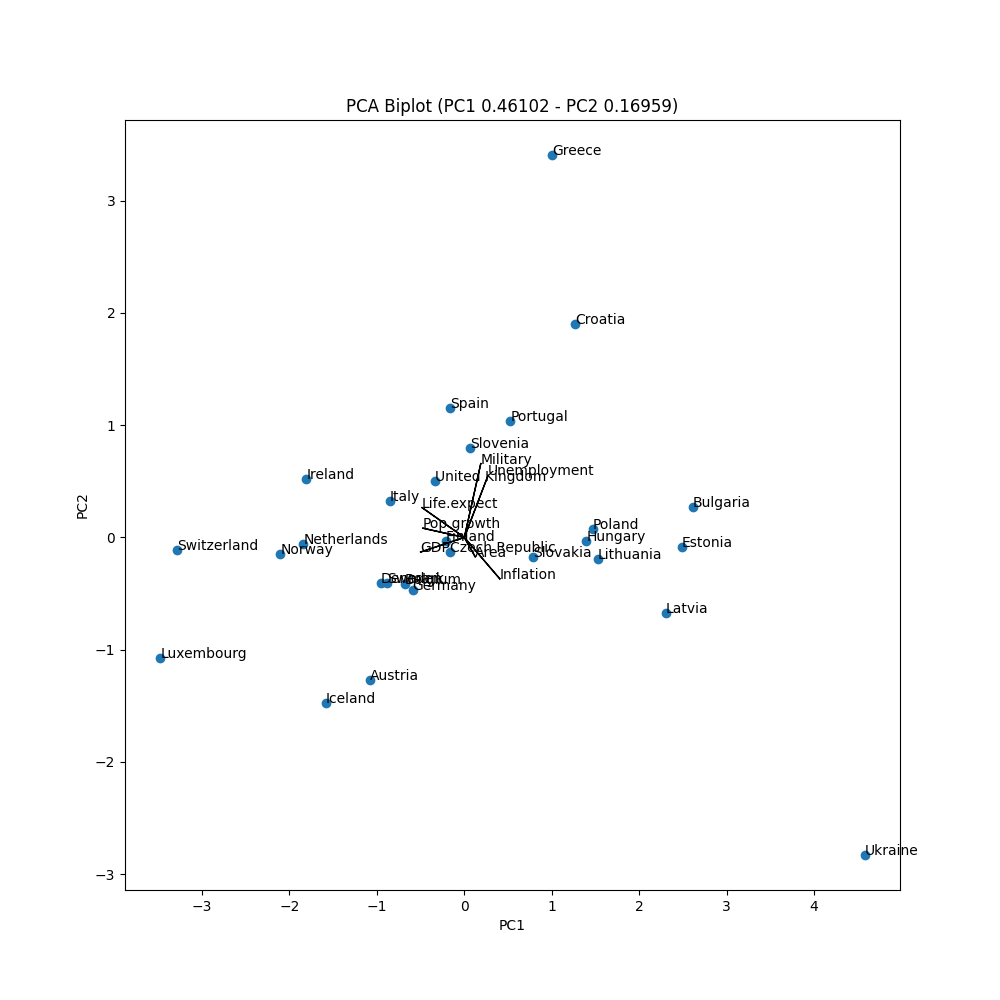

In [ ]:
second_component = components[1]
pc2_alignment = scaled_data_df.dot(second_component.T)

pc2_alignment.index = data['Country'].to_numpy()

plt.figure(figsize=(10, 10))
plt.scatter(pc1_alignment, pc2_alignment)
plt.xlabel('PC1')
plt.ylabel('PC2')

for i, txt in enumerate(data['Country'].to_numpy()):
    plt.annotate(txt, (pc1_alignment.to_numpy()[
                 i], pc2_alignment.to_numpy()[i]))

for x, y, col_name in zip(first_component.to_numpy()[0], second_component, first_component.columns):
    print(x, y)
    plt.arrow(0, 0, x, y)
    plt.annotate(col_name, (x, y))

plt.title(f'PCA Biplot (PC1 {variance_ratio.iloc[0][0]:.5f} - PC2 {variance_ratio.iloc[1][0]:.5f})')
plt.show()